In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [3]:
pd.crosstab(data[data.columns[0]] , data[data.columns[1]])

Salary,37731.0,39343.0,39891.0,43525.0,46205.0,54445.0,55794.0,56642.0,56957.0,57081.0,...,93940.0,98273.0,101302.0,105582.0,109431.0,112635.0,113812.0,116969.0,121872.0,122391.0
YearsExperience,,,,,,,,,,,,,,,,,,,,,
1.1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
np.corrcoef(data[data.columns[0]] , data[data.columns[1]])
#pretty high 0.9782 so salarayt depends on years of experiecne 

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [13]:
data.columns[1]

'Salary'

In [14]:
data.columns[0]

'YearsExperience'

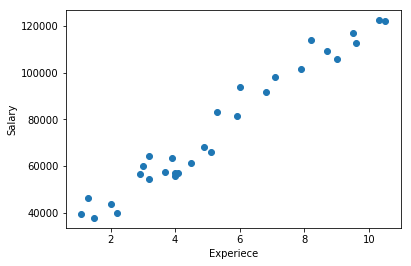

In [15]:
x = data[data.columns[0] ] 
#years of experience
#salary
y = data[ data.columns[1]]

plt.scatter(x,y)
plt.xlabel("Experiece")
plt.ylabel("Salary")
plt.show()



In [34]:
from sklearn.linear_model import LinearRegression 
xn = data[ [ data.columns[0] ] ]
yn = data[ [ data.columns[1] ] ] 

In [38]:


#lr = LinearRegression.fit(xn, yn) #u get exception if u pass 1 d 
#u get exception if u write in as above fit() missing 1 reuired positional argument : 'y'
#TypeError: fit() missing 1 required positional argument: 'y'

lr = LinearRegression().fit(xn, yn)

In [40]:
c = lr.intercept_

In [42]:
m = lr.coef_
#for slope use coef


In [45]:
accuracy = lr.score(xn,yn)
accuracy

0.9569566641435084

In [ ]:
#lets find out Accuracy manually

In [49]:
#predicting values
y_p = lr.predict(xn)
#this is an array

In [50]:
data[ 'Predicted salary'] = y_p

In [51]:
data.head()

,YearsExperience,Salary,Predicted salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [56]:
#lets find the error square

err = data[ 'Salary'] - data[ 'Predicted salary']
data['error'] = err*err;
data.head()


,YearsExperience,Salary,Predicted salary,error
0,1.1,39343.0,36187.158752,9.959334e+06
1,1.3,46205.0,38077.151217,6.606193e+07
2,1.5,37731.0,39967.143681,5.000339e+06
3,2.0,43525.0,44692.124842,1.362180e+06
4,2.2,39891.0,46582.117306,4.477105e+07


In [57]:
#lets figure out mean and then subtract from observed values
data[ 'error_observed'] = (data[ 'Salary'] - data['Salary'].mean() ) **2


In [58]:
data.head()

,YearsExperience,Salary,Predicted salary,error,error_observed
0,1.1,39343.0,36187.158752,9.959334e+06,1.343956e+09
1,1.3,46205.0,38077.151217,6.606193e+07,8.879208e+08
2,1.5,37731.0,39967.143681,5.000339e+06,1.464746e+09
3,2.0,43525.0,44692.124842,1.362180e+06,1.054820e+09
4,2.2,39891.0,46582.117306,4.477105e+07,1.304077e+09


In [65]:

TSS = data['error_observed'] .sum()
TRS = data['error'].sum()

R = 1 - float(TRS/TSS)
R
#its actually R**2


0.9569566641435086

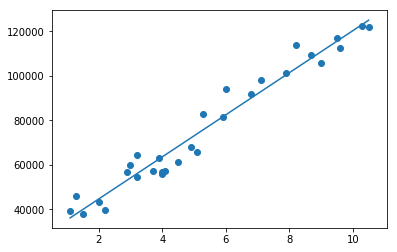

In [90]:


xd = np.array( x)
y_p = m[0,0] * xd + c[0]
plt.plot(xd , y_p)
plt.scatter(x,y)
plt.show()



C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


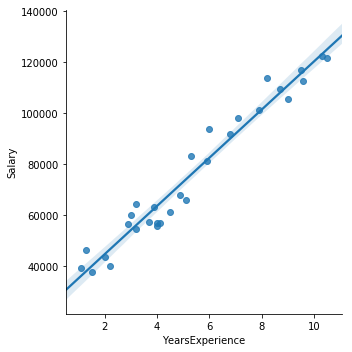

In [92]:
#plotting using seaborn
sn.lmplot(data.columns[0] , data.columns[1], data)


C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


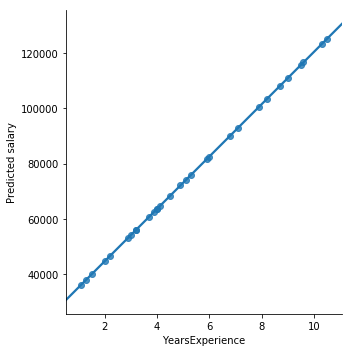

In [95]:
sn.lmplot(data.columns[0] ,'Predicted salary', data)

In [96]:
data.head()

,YearsExperience,Salary,Predicted salary,error,error_observed
0,1.1,39343.0,36187.158752,9.959334e+06,1.343956e+09
1,1.3,46205.0,38077.151217,6.606193e+07,8.879208e+08
2,1.5,37731.0,39967.143681,5.000339e+06,1.464746e+09
3,2.0,43525.0,44692.124842,1.362180e+06,1.054820e+09
4,2.2,39891.0,46582.117306,4.477105e+07,1.304077e+09


In [101]:
new_table = data.loc[ :, data.columns !='error' : data.columns != 'error_observed']
new_table

,YearsExperience,Salary,Predicted salary,error_observed
0,1.1,39343.0,36187.158752,1.343956e+09
1,1.3,46205.0,38077.151217,8.879208e+08
2,1.5,37731.0,39967.143681,1.464746e+09
3,2.0,43525.0,44692.124842,1.054820e+09
4,2.2,39891.0,46582.117306,1.304077e+09
5,2.9,56642.0,53197.090931,3.748483e+08
6,3.0,60150.0,54142.087163,2.513176e+08
7,3.2,54445.0,56032.079627,4.647474e+08
8,3.2,64445.0,56032.079627,1.335874e+08
9,3.7,57189.0,60757.060788,3.539666e+08


C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


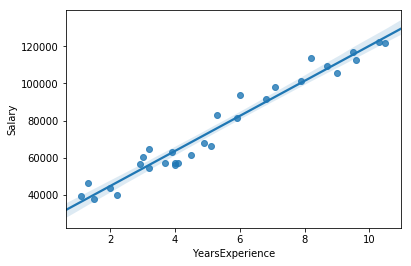

In [108]:
sn.regplot('YearsExperience','Salary',data)

C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


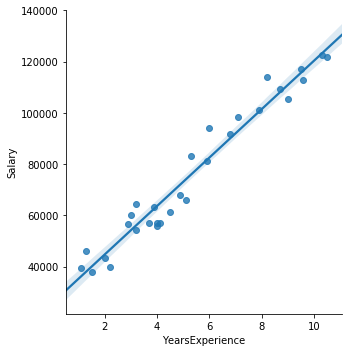

In [109]:
sn.lmplot('YearsExperience','Salary',data)

C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


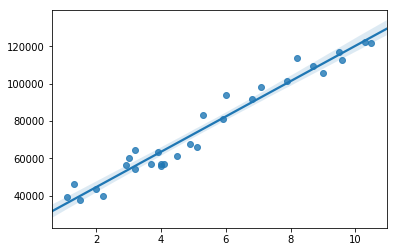

In [112]:

sn.regplot(np.array(data['YearsExperience']),np.array(data['Salary']),data)



C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


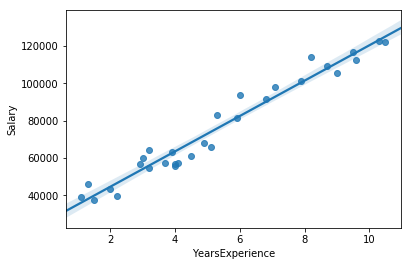

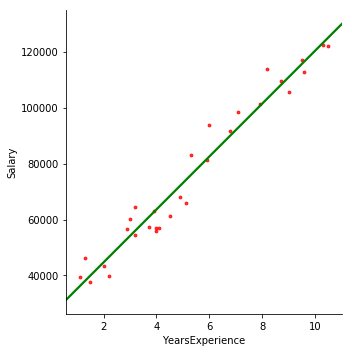

In [128]:
sn.lmplot('YearsExperience','Salary',data,ci = None, scatter_kws = { "s" : 8 , "color" : 'red'} ,line_kws = { 'color' : 'green'})





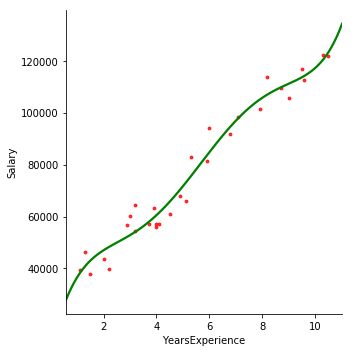

In [133]:
sn.lmplot('YearsExperience','Salary',data,ci = None,
          scatter_kws = { "s" : 8 , "color" : 'red'} ,line_kws = { 'color' : 'green'} ,
         order = 5)

#default order is 1 so its linear regression , order >1 for polynomial regression


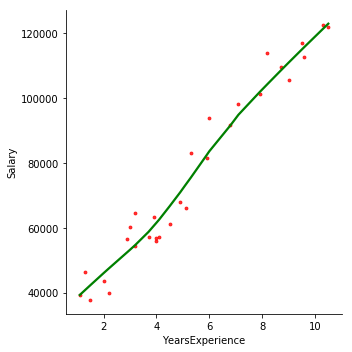

In [136]:

sn.lmplot('YearsExperience','Salary',data,ci = None,
          scatter_kws = { "s" : 8 , "color" : 'red'} ,line_kws = { 'color' : 'green'} ,
         lowess = True)



In [154]:
#lets use seaborn for telecom alaysis
d = pd.read_csv("C:\\Users\\mahidhai\\Desktop\\iiths\\telecom_churn.csv")

In [139]:
d.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [166]:
x = d [ d['Total day minutes'] <100 ]['Total day minutes']
y = d [ d['Total day minutes'] <100 ]['Churn']


C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


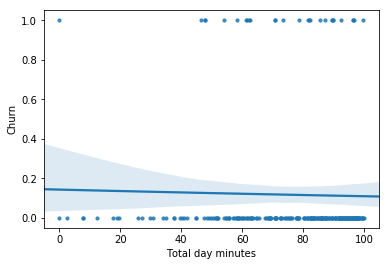

In [169]:
sn.regplot(x, y , d,scatter_kws = {"s" : 10}, logistic = True)

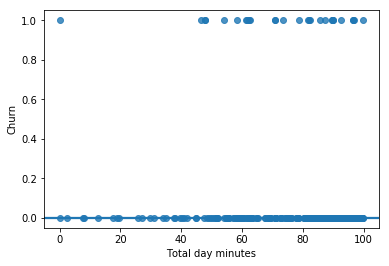

In [174]:

sn.regplot(x,y, d,robust =True, ci =None ) 



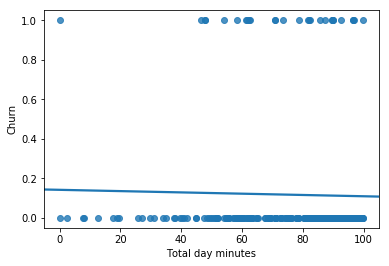

In [175]:
sn.regplot(x,y, d, ci =None ) 

In [178]:
d.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


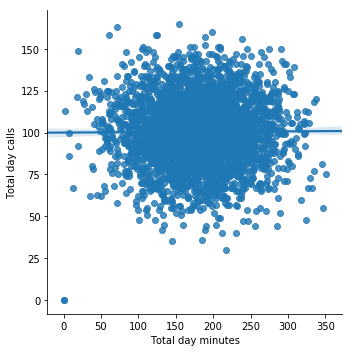

In [181]:

sn.lmplot('Total day minutes', 'Total day calls',d)

In [184]:
#huge data sets , linear regression model too approximating all poits to 100 mean
d['Total day calls'].mean()

100.43564356435644

In [189]:
dn = d.truncate( 1,100)
dn.shape

(100, 20)

In [190]:
dn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


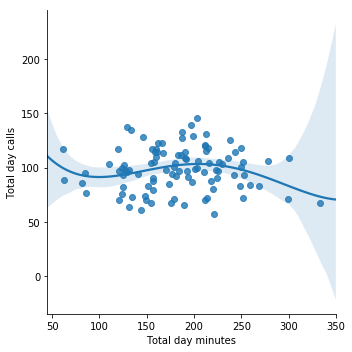

In [214]:
sn.lmplot('Total day minutes', 'Total day calls',dn, order = 4)


C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


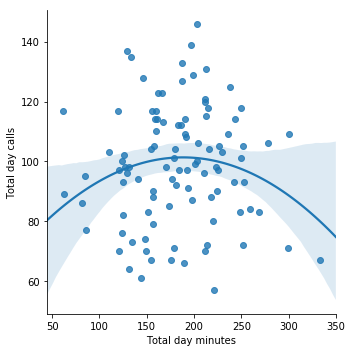

In [215]:
sn.lmplot('Total day minutes', 'Total day calls',dn, order = 2)
#there are outliers here diverging a lot


C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


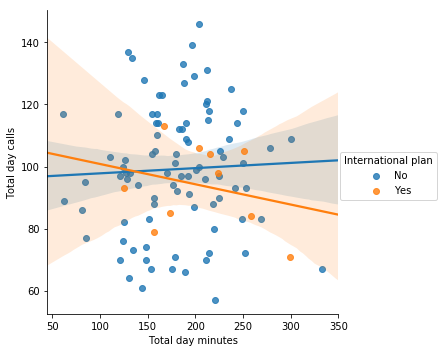

In [230]:
sn.lmplot('Total day minutes', 'Total day calls', hue="International plan", data=dn,order = 1)

C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\

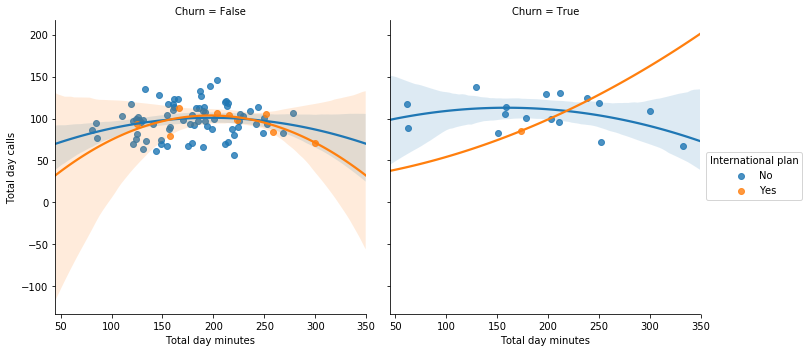

In [259]:
#lets andd anther dimension
sn.lmplot('Total day minutes', 'Total day calls', hue="International plan",col = 'Churn', data=dn,order = 2)




C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\

C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-pac

C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-pac

C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-pac

C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\mahidhai\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  reg_func = lambda _x, _y: np.polyval(np.polyfit(_x, _y, order), grid)


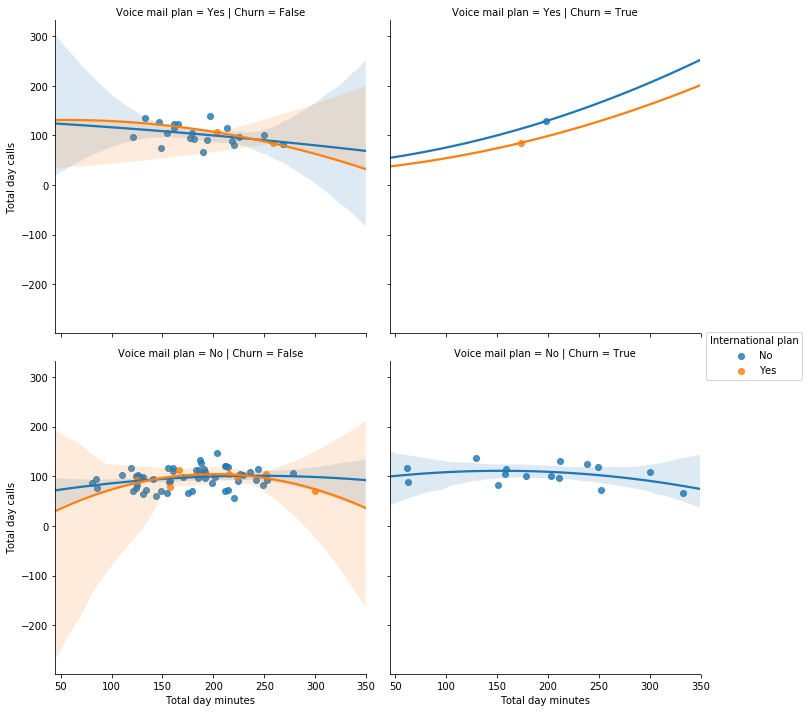

In [261]:
sn.lmplot('Total day minutes', 'Total day calls', hue="International plan",col = 'Churn',row= 'Voice mail plan' ,data=dn,order = 2)


In [262]:
#analysis from above data when extra dimension is being added 

#losts of people belong to chrun = false imples chrun usrs and have no voice calls , and most of the values are converging

# we have no customer with international plan , no voice plan and is not a churned alis chrun = true
#however queite many for no voice , churned user and he has international plan

#out of hundered two unique people 
# who has vocie pal yes , churn yes and one each has international plan yes , no viceversa


C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


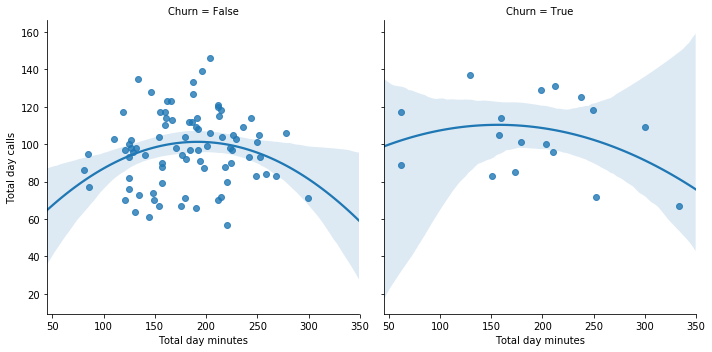

In [286]:
#other options exploring 

sn.lmplot('Total day minutes', 'Total day calls', col = 'Churn', data=dn,order = 2,col_wrap=2)

C:\Users\mahidhai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


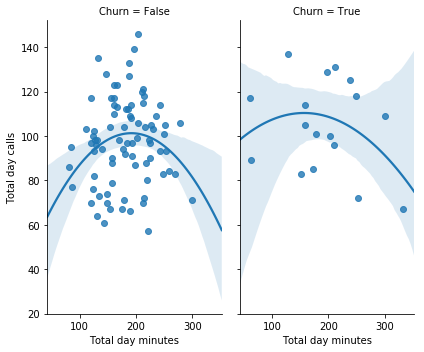

In [284]:
sn.lmplot('Total day minutes', 'Total day calls', col = 'Churn', data=dn,order = 2,aspect =0.6)
#aspect means streching the graph
